In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
df=pd.read_csv("diabetes_modified.csv")

In [29]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Diabetic
1,1.0,85.0,66.0,29.0,0.0,26.6,NaN,31.0,Non-Diabetic


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               762 non-null    float64
 1   Glucose                   751 non-null    float64
 2   BloodPressure             751 non-null    float64
 3   SkinThickness             753 non-null    float64
 4   Insulin                   765 non-null    float64
 5   BMI                       739 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       766 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(8), object(1)
memory usage: 54.1+ KB


In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,762.000000,751.000000,751.000000,753.000000,765.000000,739.000000,739.000000,766.000000
mean,3.824147,120.719041,69.102530,20.540505,79.905882,32.032882,0.471766,33.227154
std,3.360596,31.958175,19.282846,15.912954,115.431340,7.901092,0.326533,11.755153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.350000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.300000,0.375000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,128.000000,36.600000,0.621500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [32]:
df.shape

(768, 9)

In [33]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                      object
dtype: object

# outlier


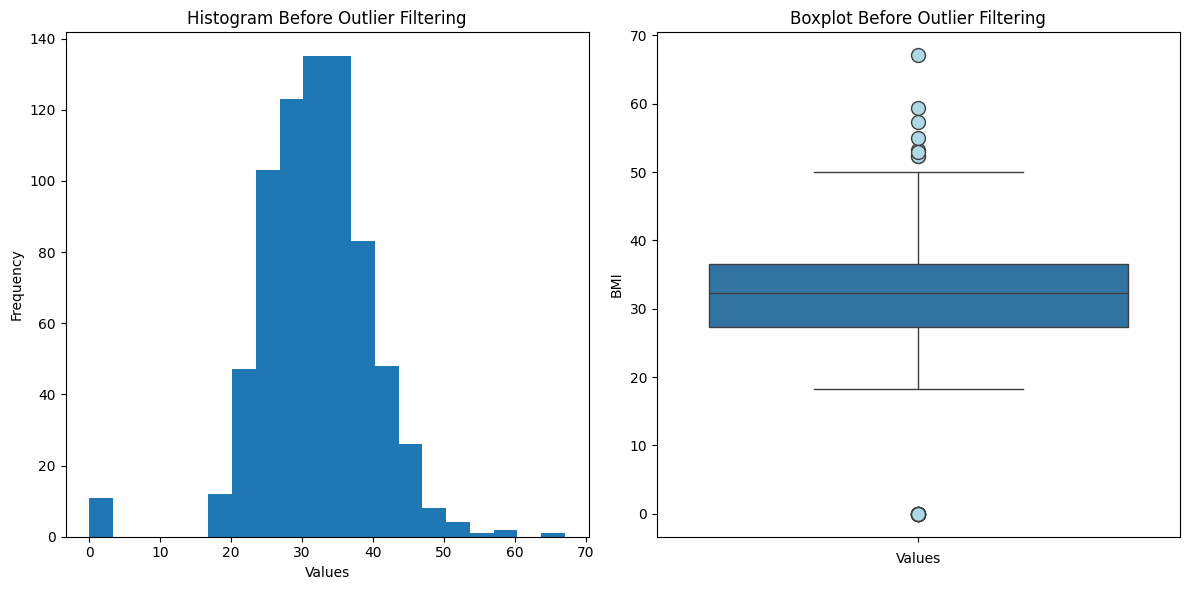

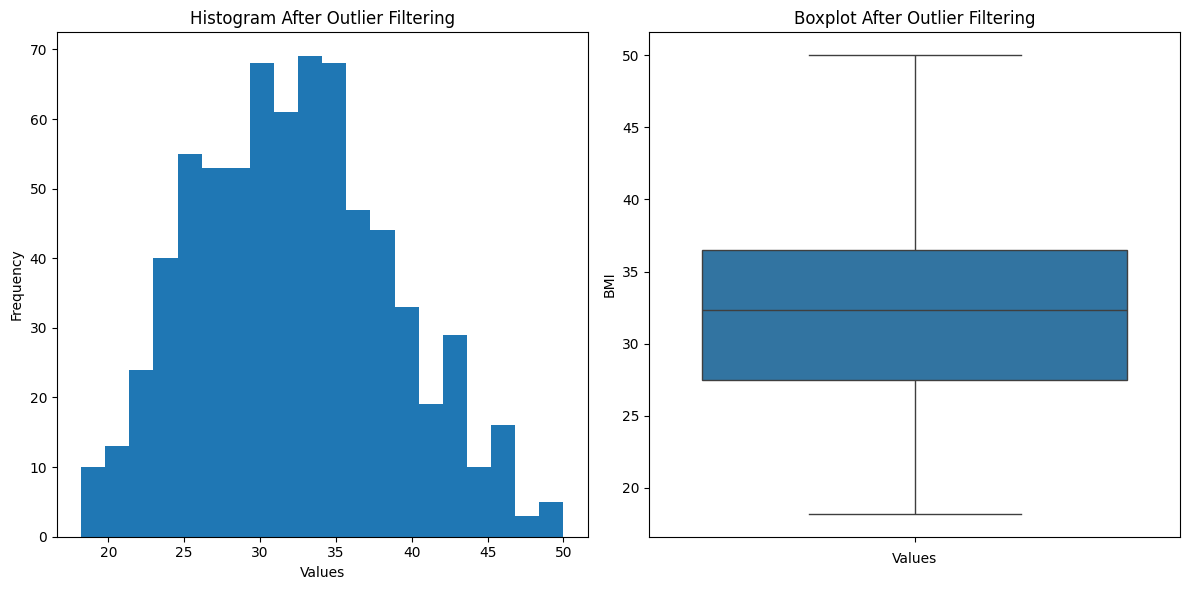

In [34]:
def plot_histogram_and_boxplot(data, column_name, title_suffix):
    plt.figure(figsize=(12, 6))    
    plt.subplot(1, 2, 1)
    plt.hist(data[column_name], bins=20)
    plt.title(f'Histogram {title_suffix}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column_name],
            flierprops=dict(marker='o', markerfacecolor='lightblue', markersize=10))
    plt.title(f'Boxplot {title_suffix}')
    plt.xlabel('Values')
    
    plt.tight_layout()
    plt.show()

def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]


# Plots before outlier removal
plot_histogram_and_boxplot(df, 'BMI', 'Before Outlier Filtering')

# Remove outliers using IQR method
df_filtered = remove_outliers_iqr(df, 'BMI')

# Plots after outlier removal
plot_histogram_and_boxplot(df_filtered, 'BMI', 'After Outlier Filtering')


### Transformation

In [35]:
# skewness 
original_skewness = df_filtered['BMI'].skew()
print("Original skewness of 'BMI' variable:", original_skewness)
# for data before outlier -0.45

Original skewness of 'BMI' variable: 0.2545074516989331


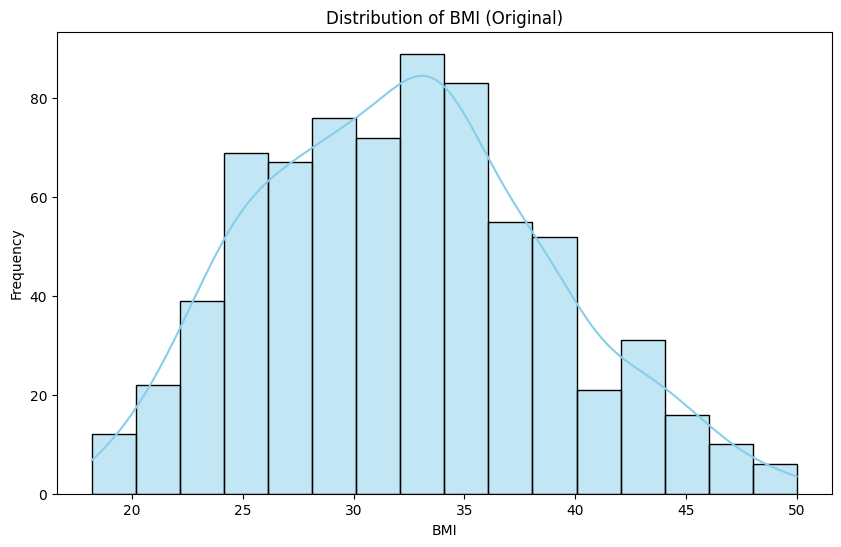

In [36]:
# Plot 
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['BMI'], kde=True, color='skyblue')
plt.title('Distribution of BMI (Original)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


In [45]:

# square root transformation 
df_filtered.loc['BMI_sqrt'] = np.sqrt(df_filtered['BMI'])

# skewness after transformation
transformed_skewness = df_filtered['BMI_sqrt'].skew()
print(f"Skewness of 'BMI' variable after square root transformation: {transformed_skewness}\n\n" )


Skewness of 'BMI' variable after square root transformation: 0.025814160330335668




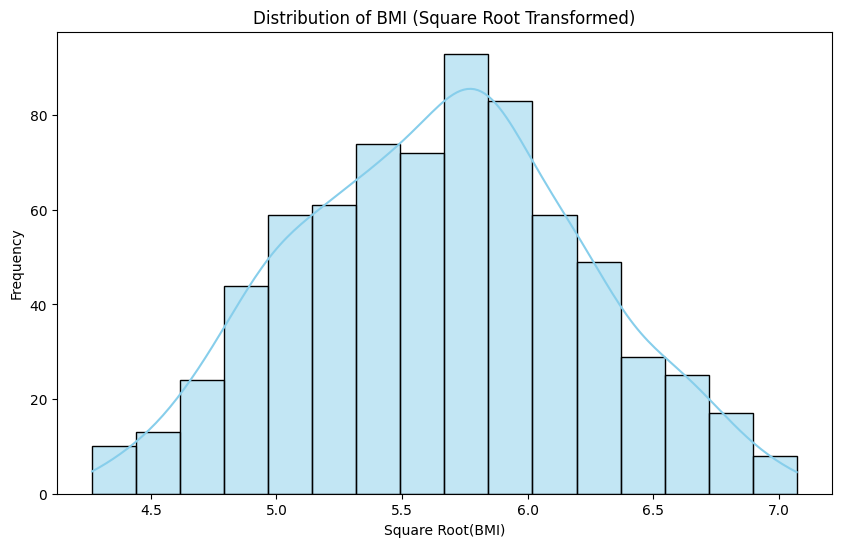

In [ ]:
# Plot 
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['BMI_sqrt'], kde=True, color='skyblue')
plt.title('Distribution of BMI (Square Root Transformed)')
plt.xlabel('Square Root(BMI)')
plt.ylabel('Frequency')
plt.show()